In [1]:
#install.packages("DAAG")
library(DAAG)

#install.packages("tree")
#install.packages("rpart")
#install.packages("mlbench")

Warning message:
"package 'DAAG' was built under R version 4.2.2"


In [2]:
#install.packages("party")

In [3]:
library(DAAG)
library(party)
library(rpart)
library(rpart.plot)
library(mlbench)
library(caret)
library(pROC)
library(tree)
library(dplyr)

Warning message:
"package 'party' was built under R version 4.2.2"
Loading required package: grid

Loading required package: mvtnorm

Loading required package: modeltools

Loading required package: stats4

Loading required package: strucchange

Loading required package: zoo


Attaching package: 'zoo'


The following objects are masked from 'package:base':

    as.Date, as.Date.numeric


Loading required package: sandwich

Warning message:
"package 'rpart' was built under R version 4.2.2"
Warning message:
"package 'rpart.plot' was built under R version 4.2.2"
Warning message:
"package 'mlbench' was built under R version 4.2.2"
Warning message:
"package 'caret' was built under R version 4.2.2"
Loading required package: ggplot2

Warning message:
"package 'ggplot2' was built under R version 4.2.2"
Loading required package: lattice

Type 'citation("pROC")' for a citation.


Attaching package: 'pROC'


The following objects are masked from 'package:stats':

    cov, smooth, var


Warning mes

In [4]:
data1<-read.csv("monkeypoxcsv.csv")

In [5]:
head(data1)

,Patient_ID,Systemic.Illness,Rectal.Pain,Sore.Throat,Penile.Oedema,Oral.Lesions,Solitary.Lesion,Swollen.Tonsils,HIV.Infection,Sexually.Transmitted.Infection,MonkeyPox
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,P0,None,False,True,True,True,False,True,False,False,Negative
2,P1,Fever,True,False,True,True,False,False,True,False,Positive
3,P2,Fever,False,True,True,False,False,False,True,False,Positive
4,P3,None,True,False,False,False,True,True,True,False,Positive
5,P4,Swollen Lymph Nodes,True,True,True,False,False,True,True,False,Positive
6,P5,Swollen Lymph Nodes,False,True,False,False,False,False,False,False,Negative


In [6]:
tail(data1)

,Patient_ID,Systemic.Illness,Rectal.Pain,Sore.Throat,Penile.Oedema,Oral.Lesions,Solitary.Lesion,Swollen.Tonsils,HIV.Infection,Sexually.Transmitted.Infection,MonkeyPox
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
24995,P24994,Fever,False,True,True,False,False,False,True,True,Positive
24996,P24995,None,True,True,False,True,True,False,False,True,Positive
24997,P24996,Fever,False,True,True,False,True,True,True,True,Positive
24998,P24997,None,True,True,False,False,True,True,False,False,Positive
24999,P24998,Swollen Lymph Nodes,False,True,False,True,True,True,False,False,Negative
25000,P24999,Swollen Lymph Nodes,False,False,True,False,False,True,True,False,Positive


In [7]:
nrow(data1)

[1] 25000

In [8]:
str(data1)

'data.frame':	25000 obs. of  11 variables:
 $ Patient_ID                    : chr  "P0" "P1" "P2" "P3" ...
 $ Systemic.Illness              : chr  "None" "Fever" "Fever" "None" ...
 $ Rectal.Pain                   : chr  "False" "True" "False" "True" ...
 $ Sore.Throat                   : chr  "True" "False" "True" "False" ...
 $ Penile.Oedema                 : chr  "True" "True" "True" "False" ...
 $ Oral.Lesions                  : chr  "True" "True" "False" "False" ...
 $ Solitary.Lesion               : chr  "False" "False" "False" "True" ...
 $ Swollen.Tonsils               : chr  "True" "False" "False" "True" ...
 $ HIV.Infection                 : chr  "False" "True" "True" "True" ...
 $ Sexually.Transmitted.Infection: chr  "False" "False" "False" "False" ...
 $ MonkeyPox                     : chr  "Negative" "Positive" "Positive" "Positive" ...


In [9]:

data1<-select(data1, -Patient_ID )
data1

Systemic.Illness,Rectal.Pain,Sore.Throat,Penile.Oedema,Oral.Lesions,Solitary.Lesion,Swollen.Tonsils,HIV.Infection,Sexually.Transmitted.Infection,MonkeyPox
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
None,False,True,True,True,False,True,False,False,Negative
Fever,True,False,True,True,False,False,True,False,Positive
Fever,False,True,True,False,False,False,True,False,Positive
None,True,False,False,False,True,True,True,False,Positive
Swollen Lymph Nodes,True,True,True,False,False,True,True,False,Positive
Swollen Lymph Nodes,False,True,False,False,False,False,False,False,Negative
Fever,False,True,False,False,False,False,True,False,Positive
Fever,True,True,False,True,True,True,False,False,Positive
Muscle Aches and Pain,False,True,True,True,False,False,False,False,Positive


In [10]:
set.seed(1)
ind <- sample(nrow(data1),.7*nrow(data1) )
#tsample <- sample(25000,10)
test <- data1[-ind,]
train<-data1[ind,]

In [11]:
length(ind)

[1] 17500

In [12]:
test

,Systemic.Illness,Rectal.Pain,Sore.Throat,Penile.Oedema,Oral.Lesions,Solitary.Lesion,Swollen.Tonsils,HIV.Infection,Sexually.Transmitted.Infection,MonkeyPox
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
5,Swollen Lymph Nodes,True,True,True,False,False,True,True,False,Positive
9,Muscle Aches and Pain,False,True,True,True,False,False,False,False,Positive
10,Fever,False,False,True,True,True,False,True,False,Negative
11,Muscle Aches and Pain,False,True,True,True,True,True,False,True,Negative
12,Swollen Lymph Nodes,True,True,False,False,True,False,False,False,Negative
17,None,True,True,False,False,True,True,True,False,Positive
22,None,False,True,False,False,False,True,True,True,Negative
23,Swollen Lymph Nodes,True,True,True,False,False,True,True,True,Positive
26,Muscle Aches and Pain,True,True,True,False,False,False,False,True,Negative


In [13]:
head(train)

,Systemic.Illness,Rectal.Pain,Sore.Throat,Penile.Oedema,Oral.Lesions,Solitary.Lesion,Swollen.Tonsils,HIV.Infection,Sexually.Transmitted.Infection,MonkeyPox
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
17401,Swollen Lymph Nodes,False,False,False,True,True,False,False,False,Positive
24388,Muscle Aches and Pain,True,True,True,False,False,False,False,False,Negative
4775,Fever,True,False,False,False,False,False,True,True,Positive
13218,Fever,False,False,True,True,False,True,True,False,Positive
10539,Fever,False,False,False,True,False,False,True,False,Positive
8462,None,False,True,False,True,True,True,True,True,Positive


In [14]:
head(train)
head(test)

,Systemic.Illness,Rectal.Pain,Sore.Throat,Penile.Oedema,Oral.Lesions,Solitary.Lesion,Swollen.Tonsils,HIV.Infection,Sexually.Transmitted.Infection,MonkeyPox
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
17401,Swollen Lymph Nodes,False,False,False,True,True,False,False,False,Positive
24388,Muscle Aches and Pain,True,True,True,False,False,False,False,False,Negative
4775,Fever,True,False,False,False,False,False,True,True,Positive
13218,Fever,False,False,True,True,False,True,True,False,Positive
10539,Fever,False,False,False,True,False,False,True,False,Positive
8462,None,False,True,False,True,True,True,True,True,Positive


,Systemic.Illness,Rectal.Pain,Sore.Throat,Penile.Oedema,Oral.Lesions,Solitary.Lesion,Swollen.Tonsils,HIV.Infection,Sexually.Transmitted.Infection,MonkeyPox
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
5,Swollen Lymph Nodes,True,True,True,False,False,True,True,False,Positive
9,Muscle Aches and Pain,False,True,True,True,False,False,False,False,Positive
10,Fever,False,False,True,True,True,False,True,False,Negative
11,Muscle Aches and Pain,False,True,True,True,True,True,False,True,Negative
12,Swollen Lymph Nodes,True,True,False,False,True,False,False,False,Negative
17,None,True,True,False,False,True,True,True,False,Positive


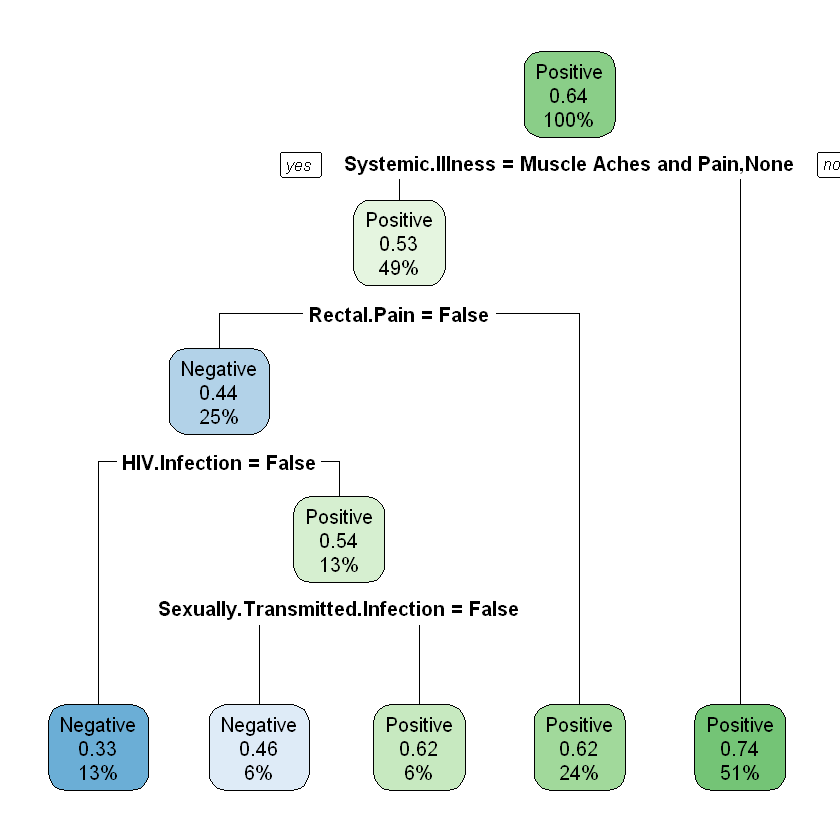

In [15]:

tree <- rpart(MonkeyPox~., data = train)
rpart.plot(tree)


Classification tree:
rpart(formula = MonkeyPox ~ ., data = train)

Variables actually used in tree construction:
[1] HIV.Infection                  Rectal.Pain                   
[3] Sexually.Transmitted.Infection Systemic.Illness              

Root node error: 6385/17500 = 0.36486

n= 17500 

        CP nsplit rel error  xerror      xstd
1 0.044479      0   1.00000 1.00000 0.0099737
2 0.030227      2   0.91104 0.91731 0.0097767
3 0.012060      3   0.88081 0.88081 0.0096756
4 0.010000      4   0.86875 0.88050 0.0096747


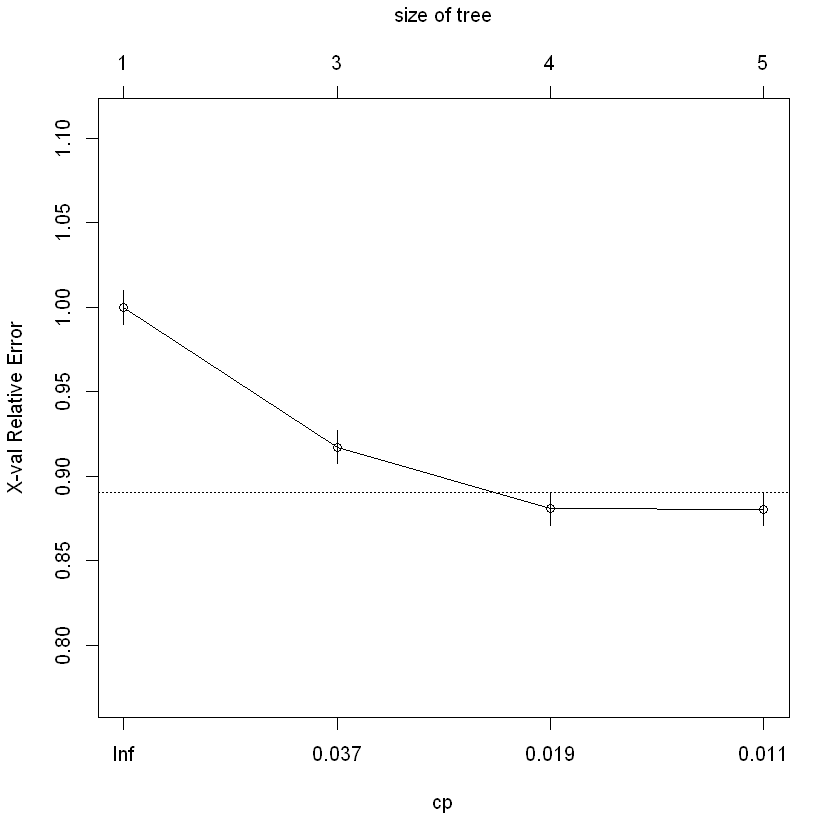

In [16]:
printcp(tree)
plotcp(tree)

In [17]:

p <- predict(tree,test, type = 'class')



In [18]:
library(gmodels)

CrossTable(p,test$MonkeyPox,
           prop.chisq= FALSE,prop.c=FALSE,prop.r=FALSE,
           dnn=c("predict",'actual'))


Warning message:
"package 'gmodels' was built under R version 4.2.2"

Attaching package: 'gmodels'


The following object is masked from 'package:pROC':

    ci





 
   Cell Contents
|-------------------------|
|                       N |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  7500 

 
             | actual 
     predict |  Negative |  Positive | Row Total | 
-------------|-----------|-----------|-----------|
    Negative |       857 |       559 |      1416 | 
             |     0.114 |     0.075 |           | 
-------------|-----------|-----------|-----------|
    Positive |      1849 |      4235 |      6084 | 
             |     0.247 |     0.565 |           | 
-------------|-----------|-----------|-----------|
Column Total |      2706 |      4794 |      7500 | 
-------------|-----------|-----------|-----------|

 


In [19]:
confusionMatrix(as.factor(p), as.factor(test$MonkeyPox))
table(p, test$MonkeyPox)


Confusion Matrix and Statistics

          Reference
Prediction Negative Positive
  Negative      857      559
  Positive     1849     4235
                                          
               Accuracy : 0.6789          
                 95% CI : (0.6682, 0.6895)
    No Information Rate : 0.6392          
    P-Value [Acc > NIR] : 2.704e-13       
                                          
                  Kappa : 0.2233          
                                          
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
            Sensitivity : 0.3167          
            Specificity : 0.8834          
         Pos Pred Value : 0.6052          
         Neg Pred Value : 0.6961          
             Prevalence : 0.3608          
         Detection Rate : 0.1143          
   Detection Prevalence : 0.1888          
      Balanced Accuracy : 0.6000          
                                          
       'Positive' Class : Negative        


          
p          Negative Positive
  Negative      857      559
  Positive     1849     4235

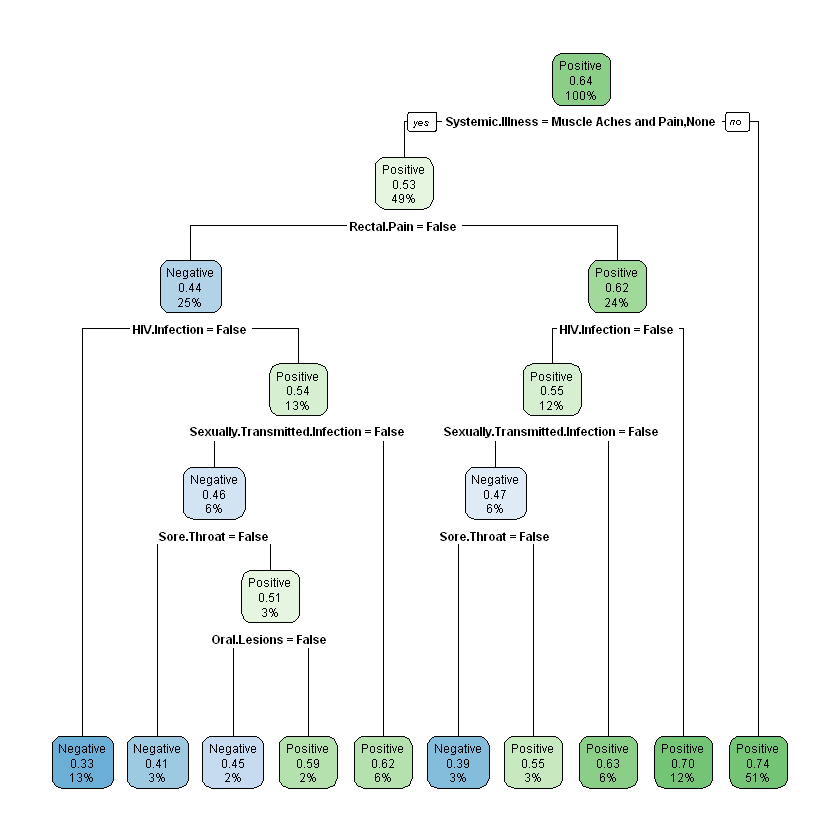

In [20]:
tree1 <- rpart(MonkeyPox ~., data = train,cp=0.002)
rpart.plot(tree1)


Classification tree:
rpart(formula = MonkeyPox ~ ., data = train, cp = 0.002)

Variables actually used in tree construction:
[1] HIV.Infection                  Oral.Lesions                  
[3] Rectal.Pain                    Sexually.Transmitted.Infection
[5] Sore.Throat                    Systemic.Illness              

Root node error: 6385/17500 = 0.36486

n= 17500 

         CP nsplit rel error  xerror      xstd
1 0.0444792      0   1.00000 1.00000 0.0099737
2 0.0302271      2   0.91104 0.92106 0.0097866
3 0.0120595      3   0.88081 0.88081 0.0096756
4 0.0045419      4   0.86875 0.87674 0.0096638
5 0.0036022      7   0.85121 0.85544 0.0096000
6 0.0020000      9   0.84401 0.85043 0.0095846


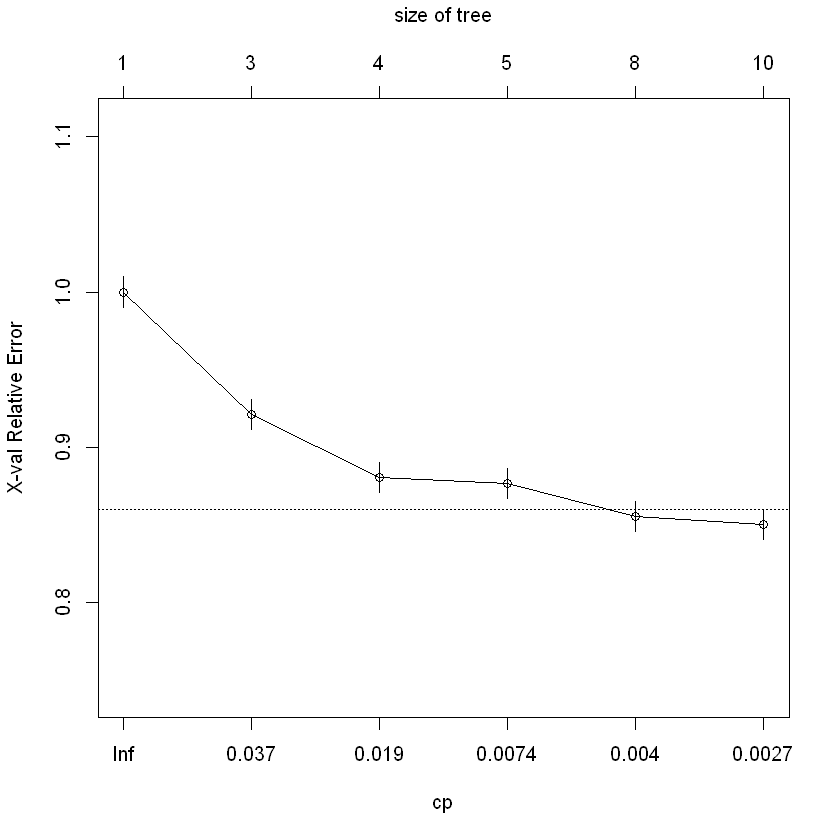

In [21]:
printcp(tree1)
plotcp(tree1)
p1 <- predict(tree1,test, type = 'class')

In [22]:
CrossTable(p1,test$MonkeyPox,
           prop.chisq= FALSE,prop.c=FALSE,prop.r=FALSE,
           dnn=c("predict",'actual'))
confusionMatrix(as.factor(p1), as.factor(test$MonkeyPox))
table(p1, test$MonkeyPox)



 
   Cell Contents
|-------------------------|
|                       N |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  7500 

 
             | actual 
     predict |  Negative |  Positive | Row Total | 
-------------|-----------|-----------|-----------|
    Negative |       920 |       570 |      1490 | 
             |     0.123 |     0.076 |           | 
-------------|-----------|-----------|-----------|
    Positive |      1786 |      4224 |      6010 | 
             |     0.238 |     0.563 |           | 
-------------|-----------|-----------|-----------|
Column Total |      2706 |      4794 |      7500 | 
-------------|-----------|-----------|-----------|

 


Confusion Matrix and Statistics

          Reference
Prediction Negative Positive
  Negative      920      570
  Positive     1786     4224
                                          
               Accuracy : 0.6859          
                 95% CI : (0.6752, 0.6964)
    No Information Rate : 0.6392          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.2451          
                                          
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
            Sensitivity : 0.3400          
            Specificity : 0.8811          
         Pos Pred Value : 0.6174          
         Neg Pred Value : 0.7028          
             Prevalence : 0.3608          
         Detection Rate : 0.1227          
   Detection Prevalence : 0.1987          
      Balanced Accuracy : 0.6105          
                                          
       'Positive' Class : Negative        


          
p1         Negative Positive
  Negative      920      570
  Positive     1786     4224

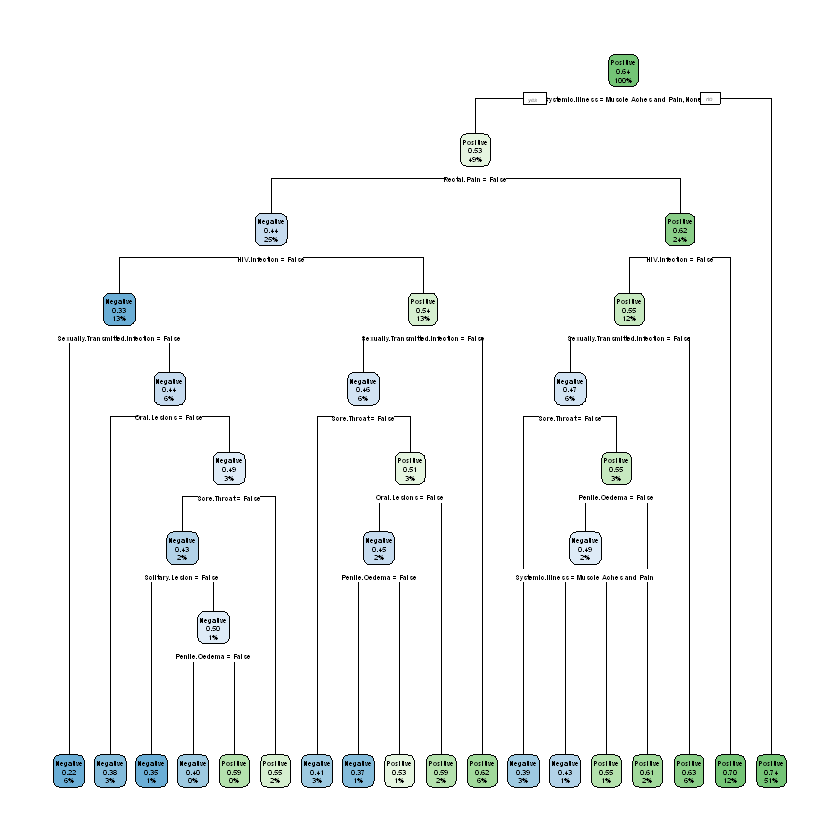

In [23]:
tree2 <- rpart(MonkeyPox ~., data = train,cp=0.0010)
rpart.plot(tree2)


Classification tree:
rpart(formula = MonkeyPox ~ ., data = train, cp = 0.001)

Variables actually used in tree construction:
[1] HIV.Infection                  Oral.Lesions                  
[3] Penile.Oedema                  Rectal.Pain                   
[5] Sexually.Transmitted.Infection Solitary.Lesion               
[7] Sore.Throat                    Systemic.Illness              

Root node error: 6385/17500 = 0.36486

n= 17500 

          CP nsplit rel error  xerror      xstd
1  0.0444792      0   1.00000 1.00000 0.0099737
2  0.0302271      2   0.91104 0.92185 0.0097886
3  0.0120595      3   0.88081 0.88081 0.0096756
4  0.0045419      4   0.86875 0.87157 0.0096486
5  0.0036022      7   0.85121 0.85842 0.0096091
6  0.0015140      9   0.84401 0.84902 0.0095802
7  0.0014096     12   0.83947 0.85200 0.0095894
8  0.0012529     14   0.83665 0.85168 0.0095885
9  0.0010180     15   0.83540 0.84996 0.0095831
10 0.0010000     17   0.83336 0.84980 0.0095826


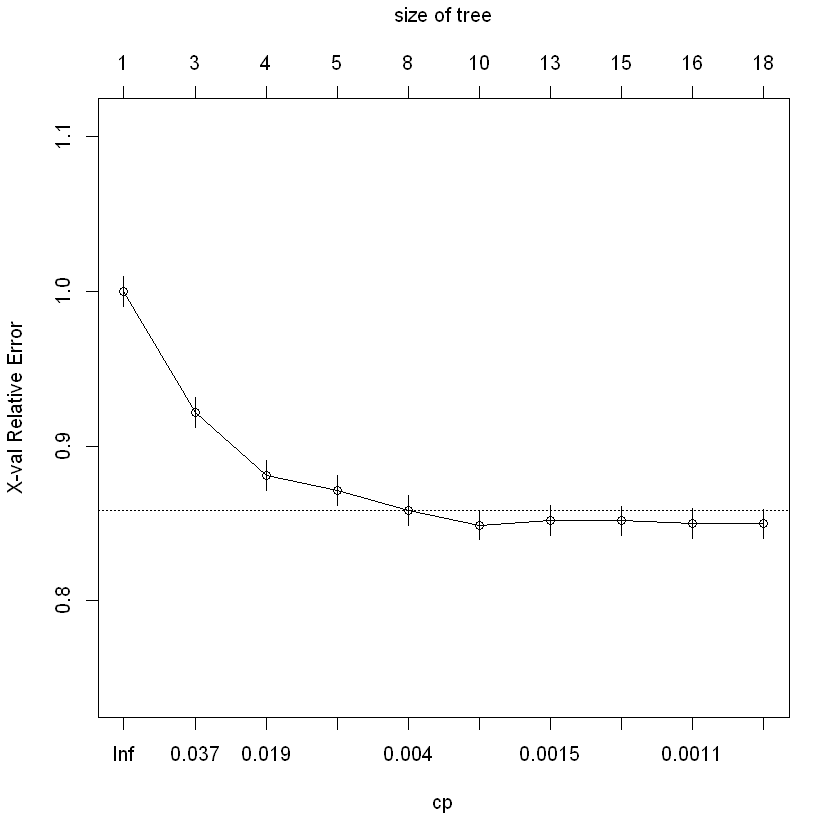

In [24]:
printcp(tree2)
plotcp(tree2)

In [25]:
p2 <- predict(tree2,test, type = 'class')




CrossTable(p2,test$MonkeyPox,
           prop.chisq= FALSE,prop.c=FALSE,prop.r=FALSE,
           dnn=c("predict",'actual'))
confusionMatrix(as.factor(p2), as.factor(test$MonkeyPox))
table(p2, test$MonkeyPox)



 
   Cell Contents
|-------------------------|
|                       N |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  7500 

 
             | actual 
     predict |  Negative |  Positive | Row Total | 
-------------|-----------|-----------|-----------|
    Negative |       862 |       484 |      1346 | 
             |     0.115 |     0.065 |           | 
-------------|-----------|-----------|-----------|
    Positive |      1844 |      4310 |      6154 | 
             |     0.246 |     0.575 |           | 
-------------|-----------|-----------|-----------|
Column Total |      2706 |      4794 |      7500 | 
-------------|-----------|-----------|-----------|

 


Confusion Matrix and Statistics

          Reference
Prediction Negative Positive
  Negative      862      484
  Positive     1844     4310
                                         
               Accuracy : 0.6896         
                 95% CI : (0.679, 0.7001)
    No Information Rate : 0.6392         
    P-Value [Acc > NIR] : < 2.2e-16      
                                         
                  Kappa : 0.2443         
                                         
 Mcnemar's Test P-Value : < 2.2e-16      
                                         
            Sensitivity : 0.3186         
            Specificity : 0.8990         
         Pos Pred Value : 0.6404         
         Neg Pred Value : 0.7004         
             Prevalence : 0.3608         
         Detection Rate : 0.1149         
   Detection Prevalence : 0.1795         
      Balanced Accuracy : 0.6088         
                                         
       'Positive' Class : Negative       
                    

          
p2         Negative Positive
  Negative      862      484
  Positive     1844     4310

In [26]:
library(rpart.plot)
library(RColorBrewer)

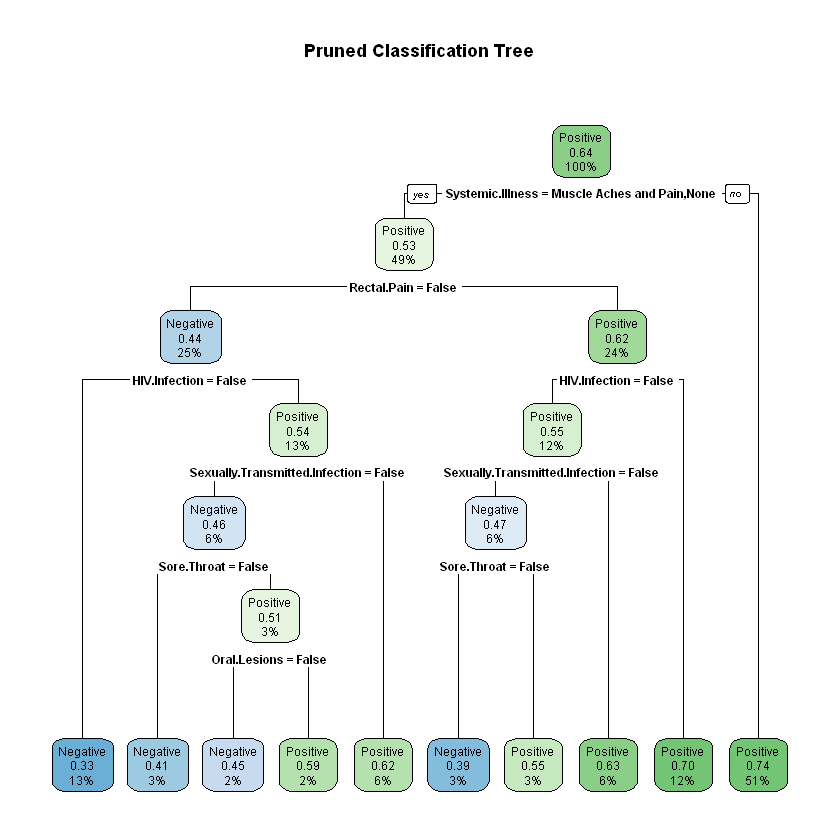

In [27]:
# Pruning of Tree
ptree<- prune(tree2,cp= tree2$cptable[which.min(tree2$cptable[,"xerror"]),"CP"])
rpart.plot(ptree, uniform=TRUE,main="Pruned Classification Tree")

ptp<-predict(ptree,test, type = 'class')


In [28]:
# Cross Table for Prune Tree
CrossTable(ptp,test$MonkeyPox,
           prop.chisq= FALSE,prop.c=FALSE,prop.r=FALSE,
           dnn=c("predict",'actual'))
confusionMatrix(as.factor(ptp), as.factor(test$MonkeyPox))
t<-table(ptp, test$MonkeyPox)


 
   Cell Contents
|-------------------------|
|                       N |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  7500 

 
             | actual 
     predict |  Negative |  Positive | Row Total | 
-------------|-----------|-----------|-----------|
    Negative |       920 |       570 |      1490 | 
             |     0.123 |     0.076 |           | 
-------------|-----------|-----------|-----------|
    Positive |      1786 |      4224 |      6010 | 
             |     0.238 |     0.563 |           | 
-------------|-----------|-----------|-----------|
Column Total |      2706 |      4794 |      7500 | 
-------------|-----------|-----------|-----------|

 


Confusion Matrix and Statistics

          Reference
Prediction Negative Positive
  Negative      920      570
  Positive     1786     4224
                                          
               Accuracy : 0.6859          
                 95% CI : (0.6752, 0.6964)
    No Information Rate : 0.6392          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.2451          
                                          
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
            Sensitivity : 0.3400          
            Specificity : 0.8811          
         Pos Pred Value : 0.6174          
         Neg Pred Value : 0.7028          
             Prevalence : 0.3608          
         Detection Rate : 0.1227          
   Detection Prevalence : 0.1987          
      Balanced Accuracy : 0.6105          
                                          
       'Positive' Class : Negative        


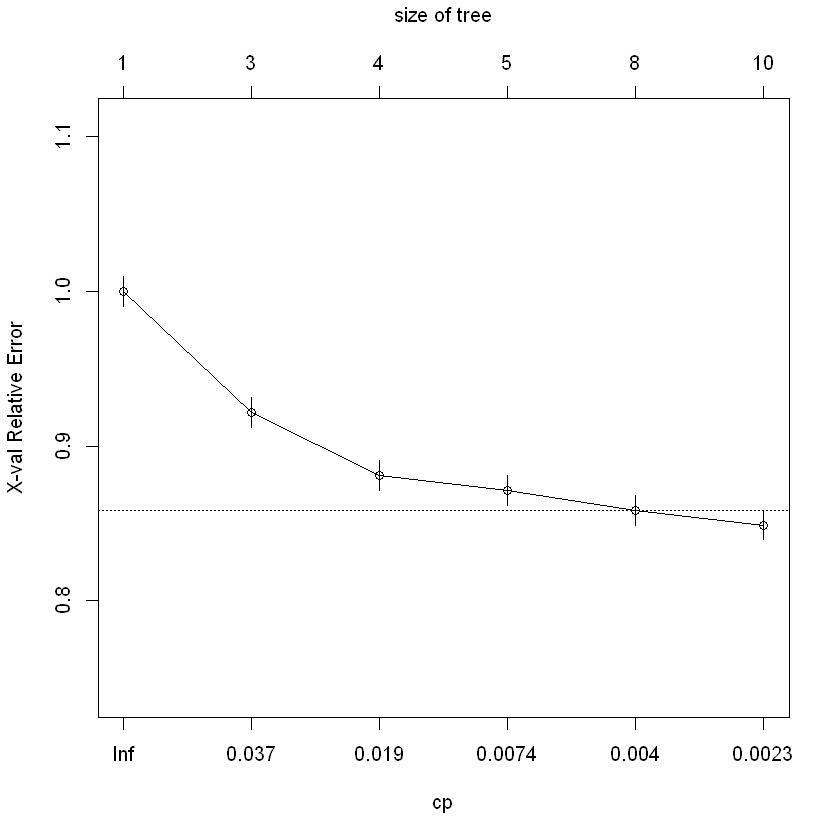

In [29]:

plotcp(ptree)

In [30]:
accuracy_Test <- (sum(diag(t)) / sum(t))*100

In [31]:
accuracy_Test

[1] 68.58667

In [33]:
#K-fold Validation error
library(plyr)
library(rpart)
set.seed(123)
form <- "MonkeyPox~."
folds <- split(data1, cut(sample(1:nrow(data1)),10))
errs <- rep(NA, length(folds))

for (i in 1:length(folds)) {
 test <- ldply(folds[i])
 train <- ldply(folds[-i])
 tmp.model <- rpart(form , test, method = "class")
 tmp.predict <- predict(tmp.model,nw=test, type = "class")
 
 conf.mat <- table(test$MonkeyPox, tmp.predict)
 errs[i] <- 1-sum(diag(conf.mat))/sum(conf.mat)
}
print(sprintf("average error using k-fold cross-validation: %.3f percent", 100*mean(errs)))
conf.mat

[1] "average error using k-fold cross-validation: 31.576 percent"


          tmp.predict
           Negative Positive
  Negative      282      608
  Positive      157     1453